In [63]:
#Import Keras and other dependencies
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [64]:
#Import other packges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
import os,array
import pandas as pd
os.chdir('C:\\Users\\soumyama\\Documents\\Python Scripts\\personal tutorial\\AV\\FashionMNIST\\train')
import time

from PIL import Image
columnNames = list()

for i in range(784):
    pixel = 'pixel'
    pixel += str(i)
    columnNames.append(pixel)


train_data1 = pd.DataFrame(columns = columnNames)
start_time = time.time()
for i in range(60000,60001):
    t = i
    img_name = str(t)+'.png'
    img = Image.open(img_name)
    rawData = img.load()
        #print rawData
    data = []
    for y in range(28):
        for x in range(28):
            data.append(rawData[x,y][0])
    print(i)
    k = 0
        #print data
    train_data1.loc[i] = [data[k] for k in range(784)]
    #print train_data.loc[0]

print("Done")
print(time.time()-start_time)

#os.chdir('../../')
#label_data = pd.read_csv("train.csv")
#print label_data
#train_labels = label_data['label']
#print label_data['label']
#train_data = pd.concat([train_data,label_data],axis = 1)
#train_data = train_data.drop('filename',1)
print(train_data1)

train_data1.to_csv("C:\\Users\\soumyama\\Documents\\Python Scripts\\personal tutorial\\AV\\FashionMNIST\\train_converted1.csv",index = False)
print("Done1")
print(time.time()-start_time)

60000
Done
0.005015134811401367
      pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9  \
60000      0      0      0      0      0      0      0      0      0      0   

        ...    pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780  \
60000   ...           0        0        0        0        0        0        0   

      pixel781 pixel782 pixel783  
60000        0        0        0  

[1 rows x 784 columns]
Done1
0.03961896896362305


In [61]:
#Rename train data for beeter understanding
x_train=train_data
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,119,113,130,76,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,32,96,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Import labels and drop ID
y_train = pd.read_csv("C:\\Users\\soumyama\\Documents\\Python Scripts\\personal tutorial\\AV\\FashionMNIST\\train.csv")
y_train.head()
y_train.drop("id", axis=1, inplace=True)
y_train=y_train.head(48999)
y_train.shape

(48999, 1)

In [54]:
#For test Data

In [55]:
#Convert train and test data into arrays
x_train=np.array(x_train, dtype='float32')
x_train=x_train/255
#y_train=np.array(y_train, dtype='float32')

#Split training data into train and validation data
x_train, x_valid, y_train, y_valid =train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

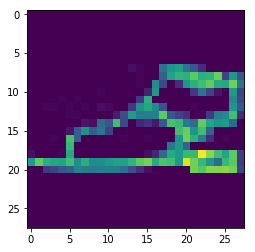

In [56]:
#Lets check an image
plt.imshow(x_train[50,:].reshape((28,28)))

In [57]:
#Reshaping the train, validation and test data
im_rows=28
im_cols=28
batch_size=512
im_shape=(im_rows, im_cols, 1)

x_train=x_train.reshape(x_train.shape[0], *im_shape)
#x_test=x_test.reshape(x_test.shape[0], *im_shape)
x_valid=x_valid.reshape(x_valid.shape[0], *im_shape)

print("x_train shape: {}".format(x_train.shape))
#print("x_test shape: {}".format(x_test.shape))
print("x_valid shape: {}".format(x_valid.shape))

x_train shape: (39199, 28, 28, 1)
x_valid shape: (9800, 28, 28, 1)


In [58]:
#Create Convolutional Neural Network Model
cnn_model= Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


In [59]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='Adam', mertics=['accuracy'])

In [60]:
cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

ValueError: Error when checking target: expected dense_4 to have shape (10,) but got array with shape (1,)